In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import time

In [2]:
data_dir = 'D:/CNN/Dataset/'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(data_dir+'train',
                                                 target_size=(100, 100),
                                                 batch_size=35,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(data_dir+'test',
                                            target_size=(100, 100),
                                            batch_size=5,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 381 images belonging to 6 classes.
Found 84 images belonging to 6 classes.


In [3]:
# Buat Model CNN

# Inisialisasi CNN
classifier = Sequential()

# Layer konvolusi dan pooling pertama
classifier.add(Convolution2D(32, (3, 3), padding='same', input_shape=(100, 100, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Layer konvolusi dan pooling kedua
classifier.add(Convolution2D(64, (3, 3), padding='same', activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dense(units=6, activation='softmax')) # softmax untuk klasifikasi lebih dari 2 data

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 40000)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print('\nAkurasi mencapai 99%')
            self.model.stop_training = True

callbacks = myCallback()

In [6]:
#Compile Model
toc = time.perf_counter()
history = classifier.fit(
        training_set,
        steps_per_epoch=5, # Total image / batch size (data training)
        epochs=15,
        validation_data=test_set,
        validation_steps=3 # Total image / batch size (data testing)
        #callbacks = [callbacks]
        )
tic = time.perf_counter()
print(f"Time Process {tic - toc:0.5f} seconds")

Epoch 1/15
5/5 [==============================] - 5s 659ms/step - loss: 1.5242 - accuracy: 0.3801 - val_loss: 1.3810 - val_accuracy: 0.4667
Epoch 2/15
5/5 [==============================] - 3s 585ms/step - loss: 0.8392 - accuracy: 0.7314 - val_loss: 0.9128 - val_accuracy: 0.7333
Epoch 3/15
5/5 [==============================] - 3s 570ms/step - loss: 0.3396 - accuracy: 0.8772 - val_loss: 1.1759 - val_accuracy: 0.7333
Epoch 4/15
5/5 [==============================] - 3s 568ms/step - loss: 0.2288 - accuracy: 0.9257 - val_loss: 0.2823 - val_accuracy: 0.9333
Epoch 5/15
5/5 [==============================] - 3s 580ms/step - loss: 0.1293 - accuracy: 0.9600 - val_loss: 0.0716 - val_accuracy: 1.0000
Epoch 6/15
5/5 [==============================] - 3s 657ms/step - loss: 0.0584 - accuracy: 0.9771 - val_loss: 0.8266 - val_accuracy: 0.8000
Epoch 7/15
5/5 [==============================] - 3s 552ms/step - loss: 0.0600 - accuracy: 0.9829 - val_loss: 1.0394 - val_accuracy: 0.8667
Epoch 8/15
5/5 [====

In [7]:
score = classifier.evaluate(test_set, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20722883939743042
Test accuracy: 0.9523809552192688


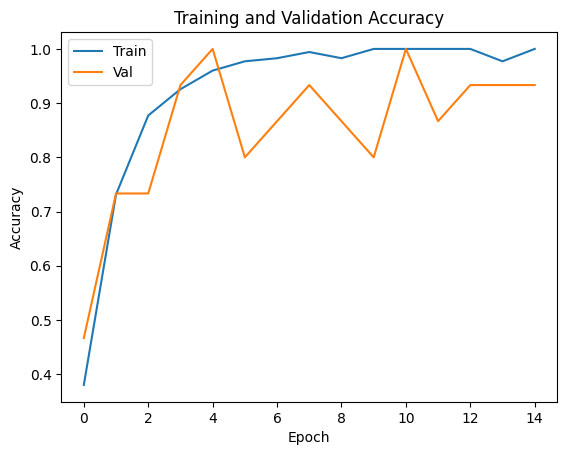

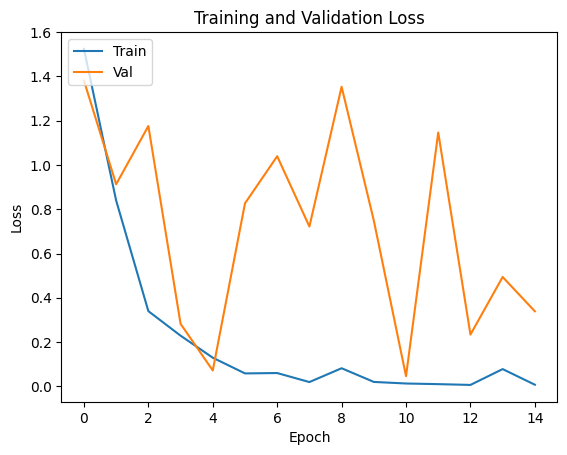

In [8]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [9]:
# Saving the model
model_json = classifier.to_json()
with open("HasilLatihBaru5.json", "w") as json_file:
    json_file.write(model_json)
classifier.save_weights('HasilLatihBaru5.h5')
print("Model Sukses Disimpan")

Model Sukses Disimpan
